<a href="https://colab.research.google.com/github/wsamyono/BulldogTeamFacHackGW23/blob/main/JSEP2022Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fundamentals of Programming
###Variables and Expressions
The concept of a variable offers a natural starting point for programming. A variable is a name that can be set to represent, or “hold,” a specific value. This definition closely parallels that found in mathematics. For example, the simple algebraic statement x = 5 is interpreted mathematically as introducing the variable x and assigning it the value 5. When Python encounters that same statement, the interpreter generates a variable named x (literally, by allocating memory), and assigns the value 5 to the variable name. The parallels between variables in Python and those in arithmetic continue in the following example, which can be typed at the prompt in any Python shell (§3.1 of the S2 Text describes how to access a Python shell):

In [ ]:
x = 5

y = 7

z = x + 2 * y

print(z)

19


As may be expected, the value of z is set equal to the sum of x and 2*y, or in this case 19. The print() function makes Python output some text (the argument) to the screen; its name is a relic of early computing, when computers communicated with human users via ink-on-paper printouts. Beyond addition (+) and multiplication (*), Python can perform subtraction (-) and division (/) operations. Python is also natively capable (i.e., without add-on libraries) of other mathematical operations, including those summarized in Table 2.

To expand on the above example we will now use the  module, which is provided by default in Python. A module is a self-contained collection of Python code that can be imported, via the import command, into any other Python program in order to provide some functionality to the runtime environment. (For instance, modules exist to parse protein sequence files, read PDB files or simulation trajectories, compute geometric properties, and so on. Much of Python’s extensibility stems from the ability to use [and write] various modules, as presented in Supplemental Chapter 4 [].) A collection of useful modules known as the standard library is bundled with Python, and can be relied upon as always being available to a Python program. Python’s  module (in the standard library) introduces several mathematical capabilities, including one that is used in this section: sin(), which takes an angle in radians and outputs the sine of that angle. For example,

In [ ]:
import math

x = math.pi/2  # pi/2 radian = 90*

y = math.sin(x)

print(y)

1.0


Python’s operator precedence rules mirror those in mathematics. For instance, 2+5*3 is interpreted as 2+(5*3). Python supports some operations that are not often found in arithmetic, such as | and is; a complete listing can be found in the official documentation [60]. Even complex expressions, like x+3>>1|y&4>=5 or 6 == z+ x), are fully (unambiguously) resolved by Python’s operator precedence rules. However, few programmers would have the patience to determine the meaning of such an expression by simple inspection. Instead, when expressions become complex, it is almost always a good idea to use parentheses to explicitly clarify the order: (((x+3 >> 1) | y&4) >= 5) or (6 == (z + x)).

The following block reveals an interesting deviation from the behavior of a variable as typically encountered in mathematics:

In [ ]:
x = 5
x = 2
print(x)

2


Viewed algebraically, the first two statements define an inconsistent system of equations (one with no solution) and may seem nonsensical. However, in Python, lines 1–2 are a perfectly valid pair of statements. When run, the print statement will display 2 on the screen. This occurs because Python, like most other languages, takes the statement x = 2 to be a command to assign the value of 2 to x, ignoring any previous state of the variable x; such variable assignment statements are often denoted with the typographic convention “x ← 2”. Lines 1–2 above are instructions to the Python interpreter, rather than some system of equations with no solutions for the variable x. This example also touches upon the fact that a Python variable is purely a reference to an object such as the integer 5(For now, take an object to simply be an addressable chunk of memory, meaning it can have a value and be referenced by a variable; objects are further described in the section on OOP.). This is a property of Python’s type system. Python is said to be dynamically typed, versus statically typed languages such as C. In statically typed languages, a program’s data (variable names) are bound to both an object and a type, and type checking is performed at compile-time; in contrast, variable names in a program written in a dynamically typed language are bound only to objects, and type checking is performed at run-time. An extensive treatment of this topic can be found in [61]. Dynamic typing is illustrated by the following example. (The pound sign, #, starts a comment; Python ignores anything after a # sign, so in-line comments offer a useful mechanism for explaining and documenting one’s code.)

In [ ]:
x = 1          # x points to an integer object
y = x          # y points to the same object as x (here, the integer 1)
x  = "monty"   # x points to a different object now (a string) ....
print(x)
print(y)       # .. but that does not alter y's reference to its object

monty
1


The above behavior results from the fact that, in Python, the notion of type (defined below)
is attached to an object, not to any one of the potentially multiple names (variables) that reference
that object. The first two lines illustrate that two or more variables can reference the same
object (known as a shared reference), which in this case is of type int. Wheny = xis executed,
y points to the object x points to (the integer 1). When x is changed, y still points to
that original integer object. Note that Python strings and integers are immutable, meaning they
cannot be changed in-place. However, some other object types, such as lists (described below),
are mutable. These aspects of the language can become rather subtle, and the various features
of the variable/object relationship—shared references, object mutability, etc.—can give rise to
complicated scenarios. Supplemental Chapter 8 (S1 Text) explores the Python memory model
in more detail.

##Statements and Types
A statement is a command that instructs the Python interpreter to do something. All expressions are statements, but a statement need not be an expression. For instance, a statement that, upon execution, causes a program to stop running would never return a value, so it cannot be an expression. Most broadly, statements are instructions, while expressions are combinations of symbols (variables, literals, operators, etc.) that evaluate to a particular value. This particular value might be numerical (e.g., 5), a string (e.g., 'foo'), Boolean (True/False), or some other type. Further distinctions between expressions and statements can become esoteric, and are not pertinent to much of the practical programming done in the biosciences. The type of an object determines how the interpreter will treat the object when it is used. Given the code x=5,wecan saythat “x is a variable that refers to an object that is of type int”. Wemaysimplify this to say “x is an int”; while technically incorrect, that is a shorter and more natural phrase. When the Python interpreter encounters the expression x+y,ifx and yare [variables that point to objects of type] int, then the interpreter would use the addition hardware on the computer to add them. If, on the other hand, x and y were of type str, then Python would join them together. If one is a str and one is an int, the Python interpreter would “raise an exception” and the program would crash. Thus far, each variable we have encountered has been an integer (int) type, a string (str), or, in the case of sin()’s output, a real number stored to high precision (a float, for floating-point number). Strings and their constituent characters are among the most useful of Python’s built-in types. Strings are sequences of characters, such as any word in the English language. In Python, a character is simply a string of length one. Each character in a string has a corresponding index, starting from 0 andranging to index n-1 for a string of n characters. Fig 1 diagrams the composition and some of the functionality of a string, and the following code-block demonstrates how to define and manipulate strings and characters:

In [ ]:
x="red"
y="green"
z="blue"
print(x+y+z)
a=x[1]
b=y[2]
c=z[3]
print(a+""+b+""+c)

redgreenblue
eee


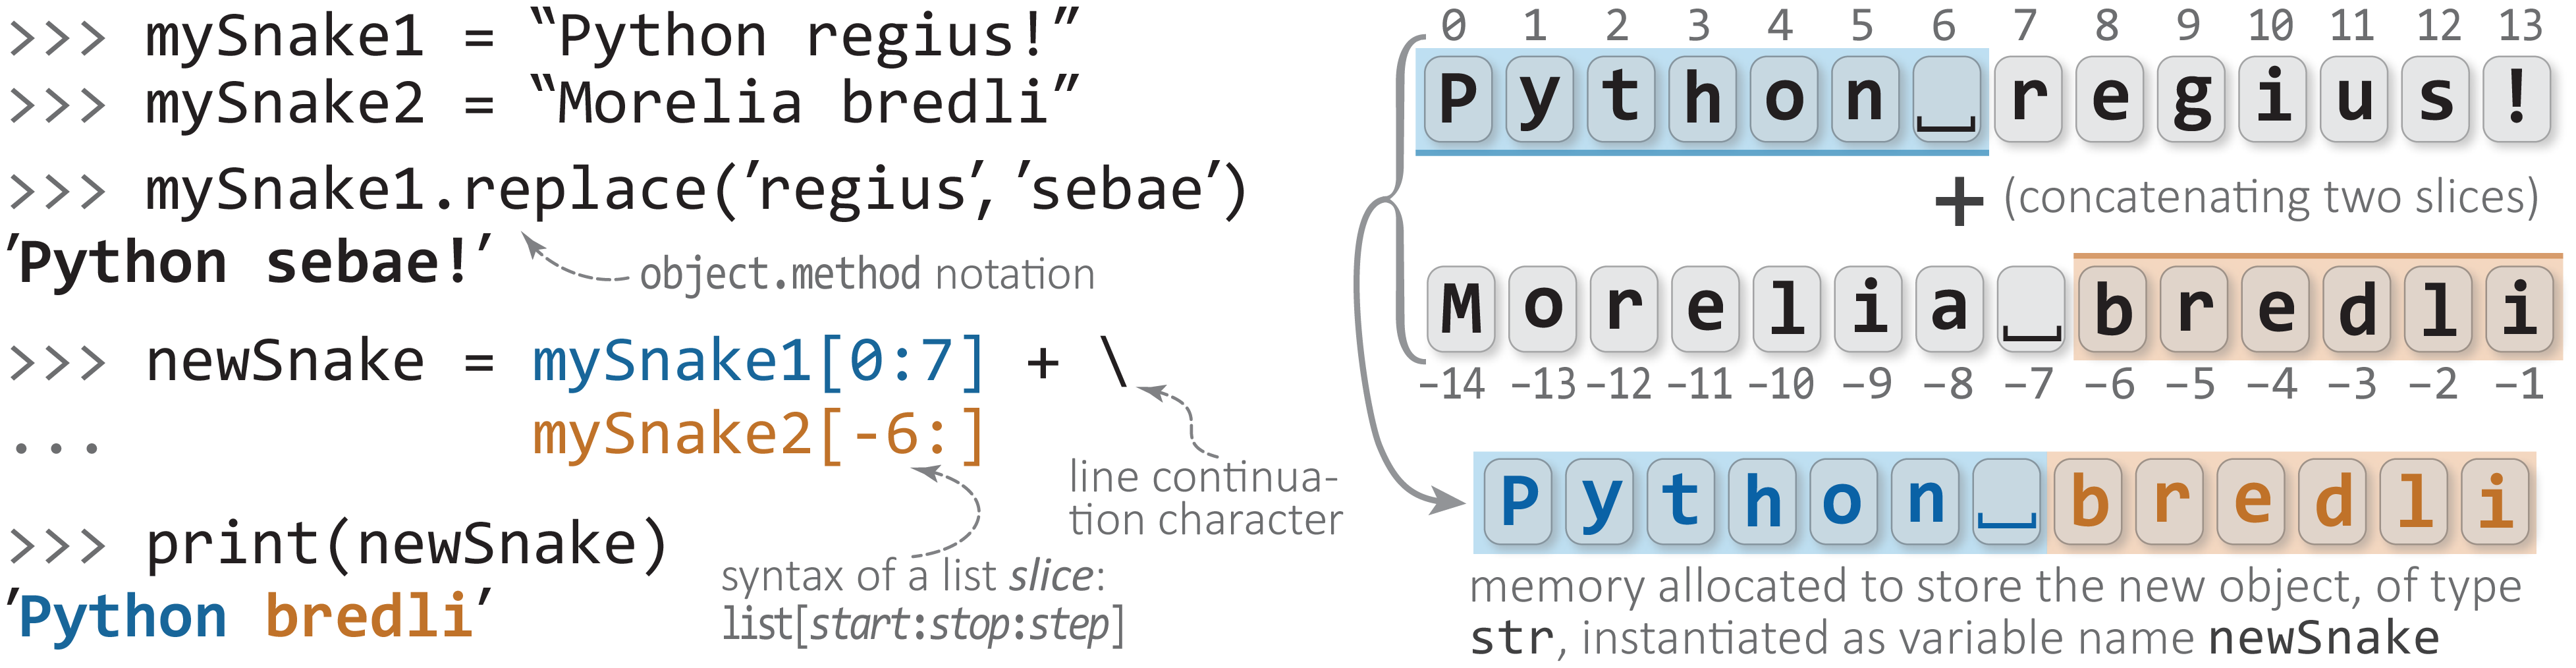

**Fig 1. Strings in Python: anatomy and basic behavior.**

The anatomy and basic behavior of Python strings are shown, as samples of actual code (left panel) and corresponding conceptual diagrams (right panel). The Python interpreter prompts for user input on lines beginning with >>> (leftmost edge), while a starting … denotes a continuation of the previous line; output lines are not prefixed by an initial character (e.g., the fourth line in this example). Strings are simply character array objects (of type str), and a sample string-specific method (replace) is shown on line 3. As with ordinary lists, strings can be ‘sliced’ using the syntax shown here: the first list element to be included in the slice is indexed by start, and the last included element is at stop-1, with an optional stride of size step (defaults to one). Concatenation, via the + operator, is the joining of whole strings or subsets of strings that are generated via slicing (as in this case). For clarity, the integer indices of the string positions are shown only in the forward (left to right) direction for mySnake1 and in the reverse direction for mySnake2. These two strings are sliced and concatenated to yield the object newSnake; note that slicing mySnake1 as [0:7] and not [0:6] means that a whitespace char is included between the two words in the resultant newSnake, thus obviating the need for further manipulations to insert whitespace (e.g., concatenations of the form word1+' '+word2).

In [ ]:
# The code for Fig 1
mySnake1 = "Python regius!"
mySnake2 = "Morelia bredli"
mySnake1 = mySnake1.replace('regius','sebae')
print(mySnake1)
newSnake = mySnake1[0:7] + mySnake2[-6:]
print(newSnake)

Python sebae!
Python bredli


Here, three variables are created by assignment to three corresponding strings. The first print may seem unusual: the Python interpreter is instructed to “add” three strings; the interpreter joins them together in an operation known as concatenation. The second portion of code stores the character 'e', as extracted from each of the first three strings, in the respective variables, a, b and c. Then, their content is printed, just as the first three strings were. Note that spacing is not implicitly handled by Python (or most languages) so as to produce humanreadable text; therefore, quoted whitespace was explicitly included between the strings (line 8; see also the underscore characters, ‘_’,in Fig 1).

## **Exercise 1:**
Write a program to convert a temperature in degrees Fahrenheit to degrees Celsius and Kelvin. The topic of user input has not been covered yet (to be addressed in the section on File Management and I/O), so begin with a variable that you pre-set to the initial temperature (in °F). Your code should convert the temperature to these other units and print it to the console.


In [ ]:
# Type the code for Exercise 1 below the line
# -----------------------------------------------


## Functions
A deep benefit of the programming approach to problem-solving is that computers enable mechanization of repetitive tasks, such as those associated with data-analysis workflows. This is true in biological research and beyond. To achieve automation, a discrete and well-defined component of the problem-solving logic is encapsulated as a function. A function is a block of code that expresses the solution to a small, standalone problem/task; quite literally, a function can be any block of code that is defined by the user as being a function. Other parts of a program can then call the function to perform its task and possibly return a solution. For instance, a function can be repetitively applied to a series of input values via looping constructs (described below) as part of a data-processing pipeline.

Much of a program’s versatility stems from its functions—the behavior and properties of each individual function, as well as the program’s overall repertoire of available functions. Most simply, a function typically takes some values as its input arguments and acts on them; however, note that functions can be defined so as to not require any arguments (e.g., print() will give an empty line). Often, a function’s arguments are specified simply by their position in the ordered list of arguments; e.g., the function is written such that the first expected argument is height, the second is weight, etc. As an alternative to such a system of positional arguments, Python has a useful feature called keyword arguments, whereby one can name a function’s arguments and provide them in any order, e.g. plotData(dataset = dats, color = 'red', width = 10). Many scientific packages make extensive use of keyword arguments [62,63]. The arguments can be variables, explicitly specified values (constants, string literals, etc.), or even other functions. Most generally, any expression can serve as an argument (Supplemental Chapter 13 covers more advanced usage, such as function objects). Evaluating a function results in its return value. In this way, a function’s arguments can be considered to be its domain and its return values to be its range, as for any mathematical function f that maps a domain X to the range Y, . If a Python function is given arguments outside its domain, it may return an invalid/nonsensical result, or even crash the program being run. The following illustrates how to define and then call (invoke) a function:

In [ ]:
def myFun(a,b):
  c = a + b
  d = a - b
  return (c*d) # NB: a return does not ' print ' anything on its own

x = myFun(1,3) + myFun(2,8) + myFun(-1,18)

print(x)

-391


To see the utility of functions, consider how much code would be required to calculate x (line 5) in the absence of any calls to myFun. Note that discrete chunks of code, such as the body of a function, are delimited in Python via whitespace, not curly braces, {}, as in C or Perl. In Python, each level of indentation of the source code corresponds to a separate block of statements that group together in terms of program logic. The first line of above code illustrates the syntax to declare a function: a function definition begins with the keyword def, the following word names the function, and then the names within parentheses (separated by commas) define the arguments to the function. Finally, a colon terminates the function definition. (Default values of arguments can be specified as part of the function definition; e.g., writing line 1 as def myFun(a = 1,b = 3): would set default values of a and b.) The three statements after def myFun(a,b): are indented by some number of spaces (two, in this example), and so these three lines (2–4) constitute a block. In this block, lines 2–3 perform arithmetic operations on the arguments, and the final line of this function specifies the return value as the product of variables c and d. In effect, a return statement is what the function evaluates to when called, this return value taking the place of the original function call. It is also possible that a function returns nothing at all; e.g., a function might be intended to perform various manipulations and not necessarily return any output for downstream processing. For example, the following code defines (and then calls) a function that simply prints the values of three variables, without a return statement:

In [ ]:
def readOut(a,b,c):

   print("Variable 1 is: ", a)

   print("Variable 2 is: ", b)

   print("Variable 3 is: ", c)

readOut(1,2,4)

Variable 1 is:  1
Variable 2 is:  2
Variable 3 is:  4


In [ ]:
readOut(21,5553,3.33)

Variable 1 is:  21
Variable 2 is:  5553
Variable 3 is:  3.33


## Code Organization and Scope
Beyond automation, structuring a program into functions also aids the modularity and interpretability of one’s code, and ultimately facilitates the debugging process—an important consideration in all programming projects, large or small.

Python functions can be nested; that is, one function can be defined inside another. If a particular function is needed in only one place, it can be defined where it is needed and it will be unavailable elsewhere, where it would not be useful. Additionally, nested function definitions have access to the variables that are available when the nested function is defined. Supplemental Chapter 13 explores nested functions in greater detail. A function is an object in Python, just like a string or an integer. (Languages that allow function names to behave as objects are said to have “first-class functions.”) Therefore, a function can itself serve as an argument to another function, analogous to the mathematical composition of two functions, g(f(x)). This property of the language enables many interesting programming techniques, as explored in Supplemental Chapters 9 and 13.

A variable created inside a block, e.g. within a function, cannot be accessed by name from outside that block. The variable’s scope is limited to the block wherein it was defined. A variable or function that is defined outside of every other block is said to be global in scope. Variables can appear within the scope in which they are defined, or any block within that scope, but the reverse is not true: variables cannot escape their scope. This rule hierarchy is diagrammed in Fig 2. There is only one global scope, and variables in it necessarily “persist” between function calls (unlike variables in local scope). For instance, consider two functions, fun1 and fun2; for convenience, denote their local scopes as ℓ1 and ℓ2, and denote the global scope as . Starting in , a call to fun1 places us in scope ℓ1. When fun1 successfully returns, we return to scope ; a call to fun2 places us in scope ℓ2, and after it completes we return yet again to . We always return to . In this sense, local scope varies, whereas global scope (by definition) persists between function calls, is available inside/outside of functions, etc. Explicitly tracking the precise scope of every object in a large body of code can be cumbersome. However, this is rarely burdensome in practice: Variables are generally defined (and are therefore in scope) where they are used. After encountering some out-of-scope errors and gaining experience with nested functions and variables, carefully managing scope in a consistent and efficient manner will become an implicit skill (and will be reflected in one’s coding style).

Well-established practices have evolved for structuring code in a logically organized (often hierarchical) and “clean” (lucid) manner, and comprehensive treatments of both practical and abstract topics are available in numerous texts. See, for instance, the practical guide Code Complete[64], the intermediate-level Design Patterns: Elements of Reusable Object-Oriented Software[65], and the classic (and more abstract) texts Structure and Interpretation of Computer Programs[39] and Algorithms[50]; a recent, and free, text in the latter class is Introduction to Computing[40]. Another important aspect of coding is closely related to the above: usage of brief, yet informative, names as identifiers for variables and function definitions. Even a mid-sized programming project can quickly grow to thousands of lines of code, employ hundreds of functions, and involve hundreds of variables. Though the fact that many variables will lie outside the scope of one another lessens the likelihood of undesirable references to ambiguous variable names, one should note that careless, inconsistent, or undisciplined nomenclature will confuse later efforts to understand a piece of code, for instance by a collaborator or, after some time, even the original programmer. Writing clear, well-defined and well-annotated code is an essential skill to develop. Table 3 outlines some suggested naming practices.

Python minimizes the problems of conflicting names via the concept of namespaces. A namespace is the set of all possible (valid) names that can be used to uniquely identify an object at a given level of scope, and in this way it is a more generalized concept than scope (see also Fig 2). To access a name in a different namespace, the programmer must tell the interpreter what namespace to search for the name. An imported module, for example, creates its own new namespace. The  module creates a namespace (called math) that contains the sin() function. To access sin(), the programmer must qualify the function call with the namespace to search, as in y = math.sin(x). This precision is necessary because merging two namespaces that might possibly contain the same names (in this case, the math namespace and the global namespace) results in a name collision. Another example would be to consider the files in a Unix directory (or a Windows folder); in the namespace of this top-level directory, one file can be named  and another , but there cannot be two files named —that would be a name collision.

## **Exercise 2:**
Recall the temperature conversion program of Exercise 1. Now, write a function to perform the temperature conversion; this function should take one argument (the input temperature). To test your code, use the function to convert and print the output for some arbitrary temperatures of your choosing.

In [ ]:
# Type your code for Exercise 2 below
# ------------------------------------


## Control Flow: Conditionals
“Begin at the beginning,” the King said gravely, “and go on till you come to the end; then, stop.”

—Lewis Carroll, Alice in Wonderland

Thus far, all of our sample code and exercises have featured a linear flow, with statements executed and values emitted in a predictable, deterministic manner. However, most scientific datasets are not amenable to analysis via a simple, predefined stream of instructions. For example, the initial data-processing stages in many types of experimental pipelines may entail the assignment of statistical confidence/reliability scores to the data, and then some form of decision-making logic might be applied to filter the data. Often, if a particular datum does not meet some statistical criterion and is considered a likely outlier, then a special task is performed; otherwise, another (default) route is taken. This branched if–then–else logic is a key decision-making component of virtually any algorithm, and it exemplifies the concept of control flow. The term control flow refers to the progression of logic as the Python interpreter traverses the code and the program “runs”—transitioning, as it runs, from one state to the next, choosing which statements are executed, iterating over a loop some number of times, and so on. (Loosely, the state can be taken as the line of code that is being executed, along with the collection of all variables, and their values, accessible to a running program at any instant; given the precise state, the next state of a deterministic program can be predicted with perfect precision.) The following code introduces the if statement:

In [ ]:
from random import randint

a = randint(0,100) # get a random integer between 0 and 100 (inclusive)
print(" a=",a)

if(a < 50):

 print("variable is less than 50")

else:

 print("the variable is not less than 50")

 a= 9
variable is less than 50


In this example, a random integer between 0 and 100 is assigned to the variable a. (Though not applicable to randint, note that many sequence/list-related functions, such as range(a,b), generate collections that start at the first argument and end just before the last argument. This is because the function range(a,b) produces b − a items starting at a; with a default stepsize of one, this makes the endpoint b-1.) Next, the if statement tests whether the variable is less than 50. If that condition is unfulfilled, the block following else is executed. Syntactically, if is immediately followed by a test condition, and then a colon to denote the start of the if statement’s block (Fig 3 illustrates the use of conditionals). Just as with functions, the further indentation on line 4 creates a block of statements that are executed together (here, the block has only one statement). Note that an if statement can be defined without a corresponding else block; in that case, Python simply continues executing the code that is indented by one less level (i.e., at the same indentation level as the if line). Also, Python offers a built-in elif keyword (a contraction of “else if”) that tests a subsequent conditional if and only if the first condition is not met. A series of elif statements can be used to achieve similar effects as the switch/case statement constructs found in C and in other languages (including Unix shell scripts) that are often encountered in bioinformatics.

In [ ]:
# Now, consider the following extension to the preceding block of code. Is there any fundamental issue with it?

from random import randint

a = randint(0,100)
print(" a=",a)

if(a < 50):

  print("variable is less than 50")

if(a > 50):

  print("variable is greater than 50")

else:

  print("the variable must be 50")

 a= 66
variable is greater than 50


This code will function as expected for a = 50, as well as values exceeding 50. However, for a less than 50, the print statements will be executed from both the less-than (line 4) and equal-to (line 8) comparisons. This erroneous behavior results because an else statement is bound solely to the if statement that it directly follows; in the above code-block, an elif would have been the appropriate keyword for line 5. This example also underscores the danger of assuming that lack of a certain condition (a False built-in Boolean type) necessarily implies the fulfillment of a second condition (a True) for comparisons that seem, at least superficially, to be linked. In writing code with complicated streams of logic (conditionals and beyond), robust and somewhat redundant logical tests can be used to mitigate errors and unwanted behavior. A strategy for building streams of conditional statements into code, and for debugging existing codebases, involves (i) outlining the range of possible inputs (and their expected outputs), (ii) crafting the code itself, and then (iii) testing each possible type of input, carefully tracing the logical flow executed by the algorithm against what was originally anticipated. In step (iii), a careful examination of “edge cases” can help debug code and pinpoint errors or unexpected behavior. (In software engineering parlance, edge cases refer to extreme values of parameters, such as minima/maxima when considering ranges of numerical types. Recognition of edge-case behavior is useful, as a disproportionate share of errors occur near these cases; for instance, division by zero can crash a function if the denominator in each division operation that appears in the function is not carefully checked and handled appropriately. Though beyond the scope of this primer, note that Python supplies powerful error-reporting and exception-handling capabilities; see, for instance, Python Programming[66] for more information.) Supplemental Chapters 14 and 16 in S1 Text provide detailed examples of testing the behavior of code.

## **Exercise 3:**
Recall the temperature-conversion program designed in Exercises 1 and 2. Now, rewrite this code such that it accepts two arguments: the initial temperature, and a letter designating the units of that temperature. Have the function convert the input temperature to the alternative scale. If the second argument is ‘C’, convert the temperature to Fahrenheit, if that argument is ‘F’, convert it to Celsius.

In [ ]:
# Write the code for Exercise 3 below.
# ---------------------------------------------------


Integrating what has been described thus far, the following example demonstrates the power of control flow—not just to define computations in a structured/ordered manner, but also to solve real problems by devising an algorithm. In this example, we sort three randomly chosen integers:

In [ ]:
from random import randint
def numberSort():
  a = randint(0,100)
  b = randint(0,100)
  c = randint(0,100)

# reminder: text following the pound sign is a comment in Python.

# begin sort; note the nested conditionals here
  if((a > b) and (a > c)):
   largest = a
   if(b > c):
     second = b
     third = c
   else:
     second = c
     third = b

# a must not be largest
  elif(b > c):
    largest = b
    if(c > a):
      second = c
      third = a
    else:
      second = a
      third = c

# a and b are not largest, thus c must be
  else:
   largest = c
   if(b < a):
      second = a
      third = b
   else:
      second = b
      third = a

# Python’s assert function can be used for sanity checks.

# If the argument to assert() is False, the program will crash.
   assert(largest > second)
   assert(second > third)

   print("Sorted:", largest, ",", second, ",", third)

numberSort()